# 01 Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Import Data

In [3]:
# Create path
path = r'/Users/dana/Documents/Instacart Basket Analysis/'

In [4]:
# import data
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged.pkl'))

# 03 Task

### Create a histogram

Text(0.5, 1.0, 'Orders by Hour of Day')

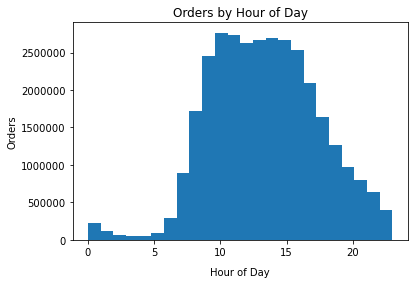

In [5]:
df_merged['order_hour_of_day'].plot.hist(bins = 24)
plt.xlabel('Hour of Day', labelpad = 10)
plt.ylabel('Orders')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Orders by Hour of Day')

In [8]:
# I chose 24 bins so that it would show each hour as a different bar. 
# This chart shows that very few orders are made between midnight and 6 a.m.
# The most frequent order times are around 10 a.m. to 4 p.m.

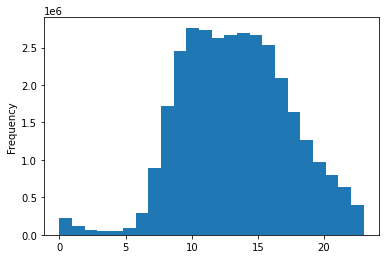

In [9]:
# save histogram
hist = df_merged['order_hour_of_day'].plot.hist(bins = 24)

In [10]:
# save as image file
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

### Create bar chart

Text(0.5, 1.0, 'Orders by Customer Loyalty')

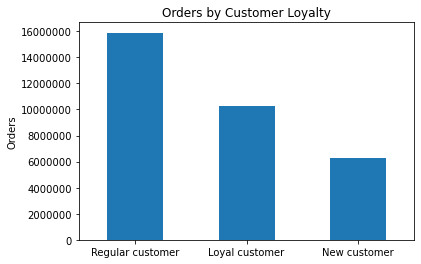

In [10]:
df_merged['loyalty_flag'].value_counts().plot.bar(rot=0)
plt.ylabel('Orders')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Orders by Customer Loyalty')

<AxesSubplot:>

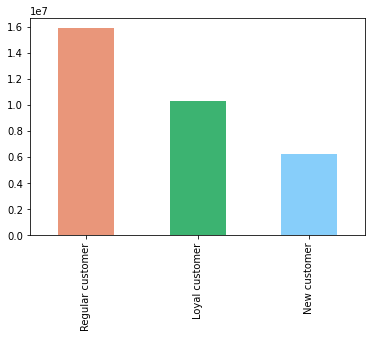

In [31]:
# add colors
df_merged['loyalty_flag'].value_counts().plot.bar(color = ['darksalmon', 'mediumseagreen','lightskyblue'])

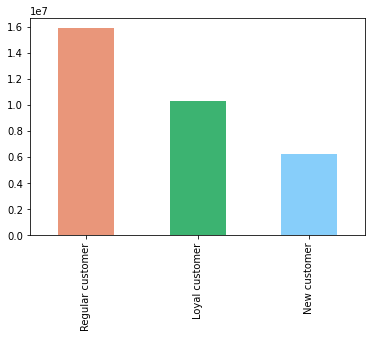

In [32]:
# save bar chart
bar = df_merged['loyalty_flag'].value_counts().plot.bar(color = ['darksalmon', 'mediumseagreen','lightskyblue'])

In [33]:
# save as image file
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

### Create a line chart

In [34]:
# create a 70/30 split
np.random.seed(4)
dev = np.random.rand(len(df_merged)) <= 0.7

In [35]:
# split the dataframe into big and small samples
big = df_merged[dev]
small = df_merged[~dev]

In [37]:
# compare sizes
len(df_merged)

32435059

In [38]:
len(big) + len(small)

32435059

In [39]:
# create a dataframe with only the columns I need
df_2 = small[['order_hour_of_day','prices']]

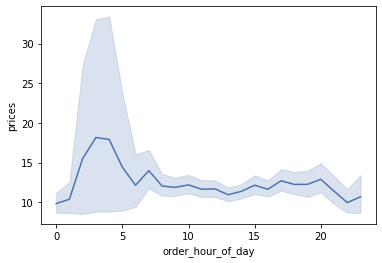

In [40]:
# create the line chart using the sampled dataset
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

In [41]:
# save as image file
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hours_and_prices.png'))

In [ ]:
# create another dataframe with only the columns I need for the second line chart
df_3 = small[['age','number_of_dependents']]

In [43]:
df_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'max_order', 'loyalty_flag',
       'avg_spent', 'spender_flag', 'order_frequency', 'order_freqency_flag',
       'First Name', 'Surnam', 'Gender', 'STATE', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

In [44]:
# my column changes didn't save so re-do that:
df_merged = df_merged.rename(columns = {'n_dependants':'number_of_dependents','Age':'age','fam_status':'family_status'})

In [45]:
df_merged = df_merged.drop(columns =['First Name','Surnam', 'Gender','STATE','date_joined','_merge'])

In [47]:
df_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'max_order', 'loyalty_flag',
       'avg_spent', 'spender_flag', 'order_frequency', 'order_freqency_flag',
       'age', 'number_of_dependents', 'family_status', 'income'],
      dtype='object')

In [48]:
# create a 70/30 split
np.random.seed(4)
dev = np.random.rand(len(df_merged)) <= 0.7

In [49]:
# split the dataframe into big and small samples
big = df_merged[dev]
small = df_merged[~dev]

In [50]:
# create another dataframe with only the columns I need
df_3 = small[['age','number_of_dependents']]

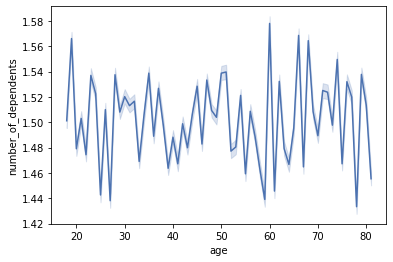

In [53]:
# create the line chart
line2 = sns.lineplot(data = df_3, x = 'age',y = 'number_of_dependents')

In [54]:
# I don't think this chart shows any clear trends. Age doesn't seem to be connected to number of dependents.

In [55]:
# save as image file
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependents.png'))

### Create a scatterplot

<AxesSubplot:xlabel='age', ylabel='income'>

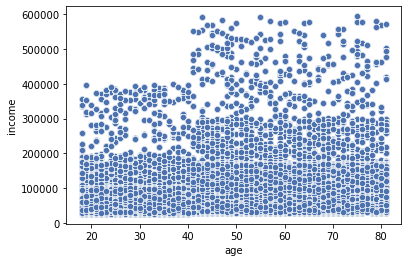

In [56]:
sns.scatterplot(x = 'age', y = 'income',data = df_merged)

In [57]:
# the scatterplot shows that there seems to be a ceiling on income at 400,000 until age 40, and
# most people have incomes lower than 200,000 until age 40, then most people have incomes lower than 300,000

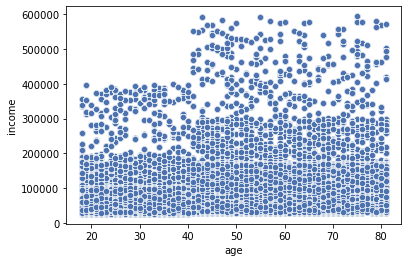

In [58]:
# save
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = df_merged)

In [59]:
# save as image file
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))

# 04 Export

In [60]:
# export df_merged since I made changes that I didn't save last time
df_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_merged.pkl'))